In [7]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
# 데이터 불러오기 
state = pd.read_csv('data/state.csv')
state.head()

### 평균

In [ ]:
state['Population'].mean()

### 절사 평균
- Signature: trim_mean(a, proportiontocut, axis=0)
- trim=0.1 은 각 끝에서 10%을 제외한다는 의미이다. 
- 이 방법을 사용하면, 직접 데이터를 삭제한 후, 평균을 구하는 불편함을 줄일 수있다.

In [ ]:
trim_mean(state['Population'], 0.1)

### 중간값

In [ ]:
state['Population'].median()

### 가중 평균

In [ ]:
np.average(state['Murder.Rate'], weights=state['Population'])

### 가중 중간값

In [ ]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

### 분산

In [ ]:
state['Population'].var()

### 표준편차

In [ ]:
state['Population'].std()

### 중위 절대 편차 ( MAD : Median Absolute Deviation )

In [ ]:
robust.scale.mad(state['Population'])

### 사분위범위(IQR)

In [ ]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

### 백분위수


In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

### 상자 그림

In [ ]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Popluation (millions)')

### 도수분포표

In [ ]:
#  pd.cut 함수는 값들을 각 구간에 매핑하는 시리즈를 만드는 것
population = pd.cut(state.Population, 10) # 균일한 10개의 구간으로 나누기
population.value_counts()

### 히스토그램

In [ ]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(4,4), color='lightcoral')
ax.set_xlabel('Polulation (millions)')

### 밀도그림

In [ ]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim = [0,12], bins = range(1,12) , color='moccasin')
state['Murder.Rate'].plot.density(ax=ax, color='sienna') # 밀도 그림을 생성하기 위한 메서드
ax.set_xlabel('Murder Rate ( per 100,000)')

### 막대도표

In [ ]:
# 데이터 불러오기
dfw = pd.read_csv('data/dfw_airline.csv')
dfw.head()

In [ ]:
ax = dfw.transpose().plot.bar(figsize = (4,4), legend =False, color='darkkhaki')
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [ ]:
# 데이터 불러오기
sp500_px = pd.read_csv('data/sp500_data.csv')
sp500_sym = pd.read_csv('data/sp500_sectors.csv')
sp500_px.head()

In [ ]:
import seaborn as sns
etfs = sp500_px.loc[sp500_px['Unnamed: 0'] > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20,220, as_cmap=True))

### 산점도

In [ ]:
etfs

In [ ]:
ax = etfs.plot.scatter(x = 'SPY', y = 'DIA', figsize=(4,4), marker = '$\u25EF$', color = 'lightcoral')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

### 육각형 구간 도표

In [14]:
kc_tax = pd.read_csv('data/kc_tax.csv')

In [15]:
# 너무 비싸거나 작은 주택들은 필터링 하기
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


In [ ]:
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
                        gridsize = 30, sharex=False, figsize = (5,4))

### 등고선

In [ ]:
kc_tax1 = kc_tax0.sample(10000)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(data=kc_tax1, x = 'SqFtTotLiving', y = 'TaxAssessedValue', color = 'lightslategray')

### 분할표

In [ ]:
lc_loans = pd.read_csv('data/lc_loans.csv')

In [ ]:
# magins 키워드 인수는 열과 행의 함계를 추가할수있다.
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

# 열합계를 무시하고 피벗테이블의 복사본을 만든다
df= crosstab.loc['A':'G',:].copy()

# 행 합계로 행을 나눈다.
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)

# 'All' 열을 총합으로 나눈다.
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [ ]:
perc_crosstab


### 상자그림

In [3]:
airline_stats = pd.read_csv('data/airline_stats.csv')

Text(0.5, 0.98, '')

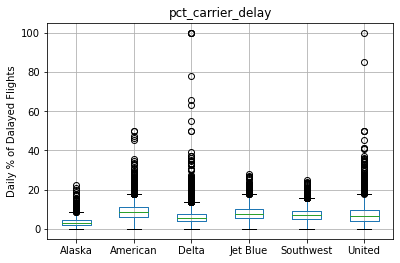

In [11]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Dalayed Flights')
plt.suptitle('')

### 바이올린 도표

/Users/hwajeong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of Delayed Flights')

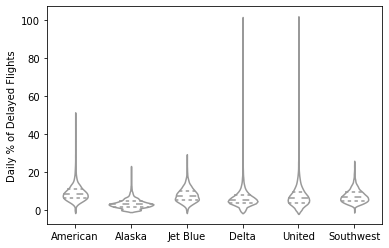

In [12]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                   inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

### 조건화 변수 개념을 활용해서 그린 시각화

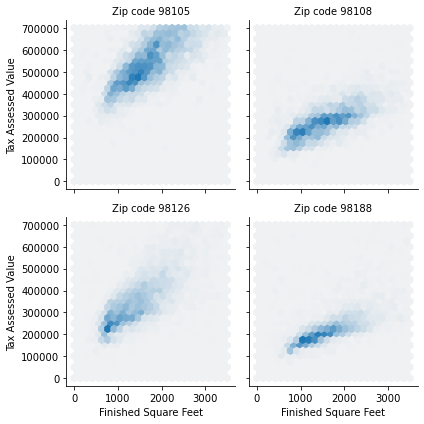

In [21]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

    
# 조건 변수를 지정하려면 col, row 인수를 사용한다. 
# 단일 조건 변수의 경우 col_wrap 과 함께 col을 사용하여 패싯 그래프를 여러행으로 래핑한다.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# map 메서드는 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수를 호출한다.
# extent는 x 측과 y축의 한계를 정의한다.
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')